In [48]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [51]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# Declare a Base using `automap_base()`
base = automap_base()
# Use the Base class to reflect the database tables
base.prepare(autoload_with=engine)
# Create the inspector and connect it to the engine
inspector = inspect(engine)
conn = engine.connect()

In [32]:
# reflect an existing database into a new model

# reflect the tables


In [52]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [53]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station


In [54]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [55]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [34]:
# measurement = pd.read_sql("SELECT * FROM measurement", conn)
# measurement = measurement.sort_values(["date"], ascending=False)
# measurement.head()

,id,station,date,prcp,tobs
19549,19550,USC00516128,2017-08-23,0.45,76.0
7634,7635,USC00514830,2017-08-23,0.00,82.0
12186,12187,USC00519523,2017-08-23,0.08,82.0
2723,2724,USC00519397,2017-08-23,0.00,81.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [57]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date < '2017-08-23').\
# filter(measurement.date > '2016-08-23').order_by(measurement.date.desc()).all()

data = pd.read_sql("SELECT date, prcp FROM measurement WHERE date < '2017-08-23' and\
 date > '2016-08-23';", conn)
data = data.set_index("date")
data.plot.bar()

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data




<AxesSubplot:xlabel='date'>

Error in callback <function flush_figures at 0x0000017C79E650D0> (for post_execute):


KeyboardInterrupt: 

In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,prcp
count,2011.000000
mean,0.176549
std,0.460667
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [64]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(measurement.station).count()
stations

19550

In [75]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count = pd.read_sql("SELECT station, count(id), id FROM measurement GROUP BY station\
 ORDER BY count(id) DESC;", conn)
count.head()

,station,count(id),id
0,USC00519281,2772,12188
1,USC00519397,2724,1
2,USC00513117,2709,2725
3,USC00519523,2669,9519
4,USC00516128,2612,16939


In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most = pd.read_sql("SELECT tobs FROM measurement WHERE station = 'USC00519281';", conn)
most.head()
most.describe()

,tobs
count,2772.000000
mean,71.663781
std,4.357642
min,54.000000
25%,69.000000
50%,72.000000
75%,74.000000
max,85.000000


<AxesSubplot:xlabel='tobs'>

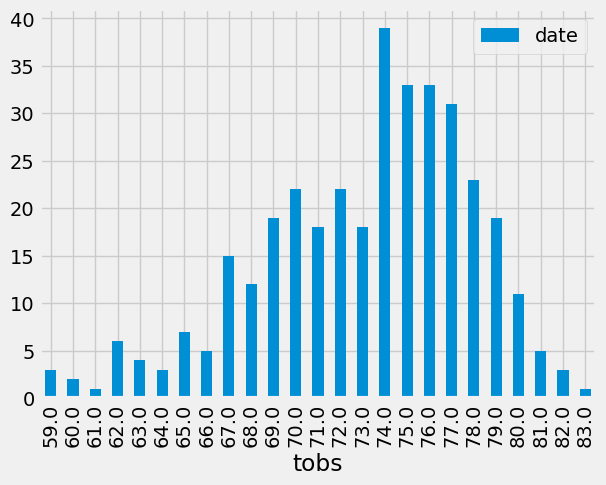

In [117]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stat = pd.read_sql("SELECT tobs, date FROM measurement WHERE station = 'USC00519281';", conn)
stat = stat.sort_values("date", ascending= False)
stati = pd.read_sql("SELECT tobs, date FROM measurement WHERE station = 'USC00519281' and \
date < '2017-08-18' and date > '2016-08-18';", conn)
stati = stati.groupby("tobs").count().sort_values('tobs')
stati.head()
stati.plot.bar()

# Close session

In [ ]:
# Close Session
session.close()